# Zeros of the Riemann Zeta Function

In [1]:
# import libraries
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from mpmath import *

import warnings

warnings.filterwarnings("ignore")  # ignore warnings
mp.dps = 10; mp.pretty = False

In [2]:
N = 10000 # the number of discrete steps
T = 100 # the number of continuous time steps
dt = 1.0 * T/N  # total number of time steps
t = linspace(0.0, N*dt, N+1)
z = [zeta(0.5 + tt*j) for tt in t]

In [3]:
re_z = np.array([float(z[i].real) for i in range(len(z))])  # parse the real part
im_z = np.array([float(z[i].imag) for i in range(len(z))])  # parse the imag part

# Plot the zeros

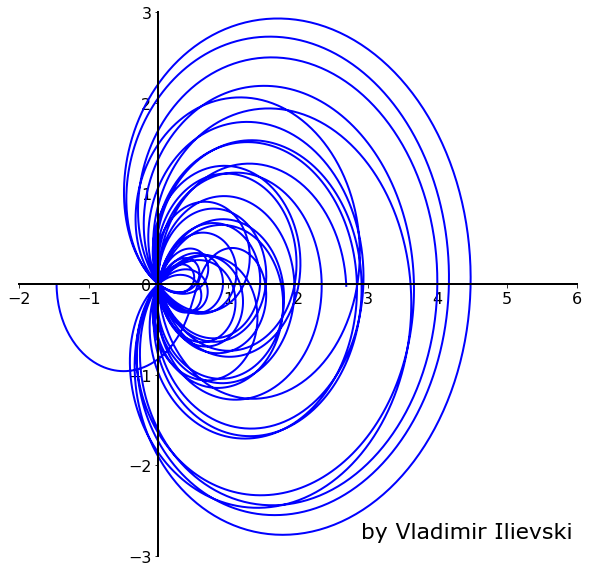

In [13]:
fig = plt.figure(figsize=(10, 10), frameon=False)
ax = plt.axes(xlim=(-2, 6), ylim=(-3, 3))  # create an axes object

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_linewidth(2.0)

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(labelsize=16)
plt.gcf().text(0.6, 0.15, 'by Vladimir Ilievski', fontsize=22, fontfamily='Verdana')

plt.plot(re_z, im_z, lw=2, color='b')
plt.savefig('riemann_zeta_zeros.png', dpi=300, bbox_inches='tight', aspect='auto')

# Animated Visualization

In [5]:
N = 10000 # the number of discrete steps
T = 100 # the number of continuous time steps
dt = 1.0 * T/N  # total number of time steps
t = linspace(0.0, N*dt, N+1)
z = [zeta(0.5 + tt*j) for tt in t]

In [6]:
re_z = np.array([float(z[i].real) for i in range(len(z))])  # parse the real part
im_z = np.array([float(z[i].imag) for i in range(len(z))])  # parse the imag part

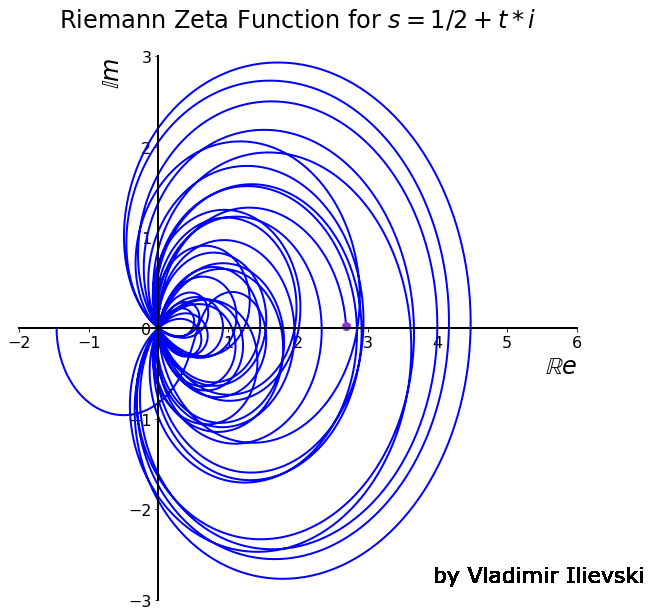

In [7]:
fig = plt.figure(figsize=(10, 10))  # instantiate a figure
ax = plt.axes(xlim=(-2, 6), ylim=(-3, 3))  # create an axes object

line, = ax.plot([], [], lw=2, color='b')
point, = ax.plot([], [],  marker='o', markersize=8, color="#9932cc")

# formatting options
ax.set_title('Riemann Zeta Function for $s = 1/2 + t*i $', fontsize=24, pad=30)

ax.spines['left'].set_position('zero')
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_linewidth(2.0)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel('$\mathbb{R}e$', fontsize=24, loc='right')
ax.set_ylabel('$\mathbb{I}m$', fontsize=24, loc='top')
ax.tick_params(labelsize=16)

# animation options
frames = 500
factor = N // frames

def animate(i):
    upper_bound = (i + 1)*factor  # up to what index to take the values
    re_z_i = re_z[:upper_bound]  # take the real 
    im_z_i = im_z[:upper_bound]
    
    line.set_data(list(re_z_i), list(im_z_i))
    point.set_data([re_z[upper_bound - 1]], [im_z[upper_bound - 1]])
    plt.gcf().text(0.7, 0.15, 'by Vladimir Ilievski', fontsize=22, fontfamily='Verdana')
    
    return line, point,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=30, blit=True)
# save the animation
anim.save('riemann_zeta_zeros.gif', writer='imagemagick') 